In [11]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import math as m
import scipy.constants as const
import lmfit

In [12]:
with open('Data/Aufg_5.4.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T
for i in range(len(data[1])):
    data[0][i]-= 729900


data = f.channel_to_pos(data,cal)

In [13]:
data[1] = data[1]*10
yerr = 0.035339825186025027*np.abs(data[1])
print(np.mean(data[2]))

0.030193000531300133


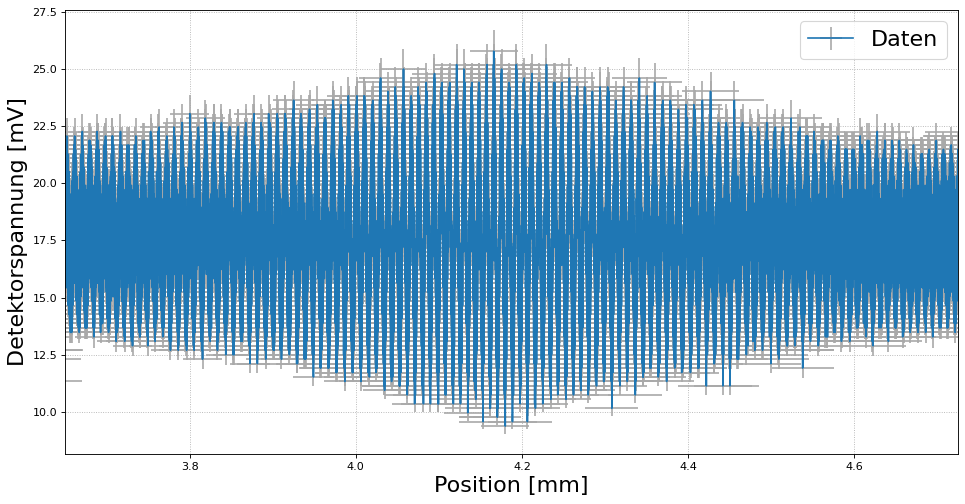

In [14]:
f.figsize(2)
plt.errorbar(data[0],data[1],yerr=yerr,xerr=data[2],label = 'Daten',ecolor='darkgray')

f.form([3.650,4.725],xlabel='Position [mm]',ylabel='Detektorspannung [mV]')

[[Model]]
    Model(cosfit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 61
    # data points      = 3275
    # variables        = 2
    chi-square         = 51680675.2
    reduced chi-square = 15790.0016
    Akaike info crit   = 31661.8574
    Bayesian info crit = 31674.0455
    R-squared          = -1243.84015
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a: -81124.5128 (init = 1)
    b: -119.439227 (init = 1)


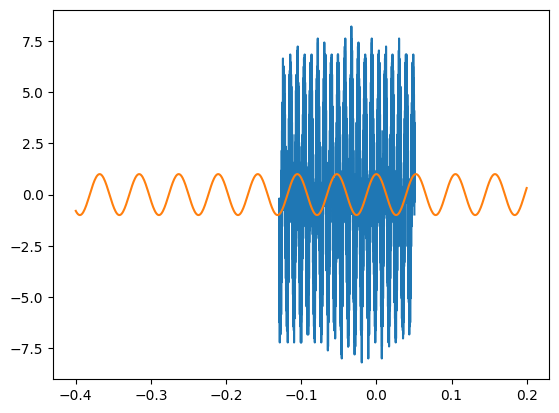

In [15]:
von , bis = f.pos(data[0],4.07),f.pos(data[0],4.25)
data[1] -= np.mean(data[1])
data[0] -=4.199407999308831
def cosfit(x,a,b):
    return np.exp((-x**2)/(a**2))*np.cos(b*x)


model_func = lmfit.model.Model(cosfit)  

#parameter erstellen
pars_func = model_func.make_params()

pars_func["a"].set(value=1)#,min=0.01,max=1)
pars_func["b"].set(value=1)#,min=0.01,max=1)

#Fitten
res = model_func.fit(data[1][von:bis],x=data[0][von:bis],params=pars_func,weights=1/data[2][von:bis],nan_policy='propagate')
print(res.fit_report())

plt.errorbar(data[0][von:bis],data[1][von:bis])
plt.plot(np.arange(3.8-4.2,4.4-4.2,0.001),res.eval(x=np.arange(3.8-4.2,4.4-4.2,0.001)),zorder=10)
